In [3]:
import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
%matplotlib inline

<p>To find experiment containers with the desired conditions, call get_container_list() filter data frame for the right IDs.  This example finds a list of IDs for a specific area and cre line:

In [13]:
import allen_data_fetch
container_list = allen_data_fetch.get_container_list()

print container_list

container_list_filt = container_list[(container_list['targeted_structure'] == 'VISpm') & 
                                     (container_list['cre_line'] == 'Cux2-CreERT')]
print container_list_filt

    age_days        cre_line         id  imaging_depth targeted_structure
0        143    Cux2-CreERT2  511510695            175              VISal
1         80        Rbp4-Cre  511511015            375              VISpm
2         98  Scnn1a-Tg3-Cre  511510911            350               VISp
3        152    Cux2-CreERT2  511510736            175               VISp
4        123  Rorb-IRES2-Cre  511510733            275              VISpm
5        132    Cux2-CreERT2  511510797            175              VISal
6        111    Cux2-CreERT2  511510994            175               VISl
7         97        Rbp4-Cre  511510742            375               VISl
8        111    Cux2-CreERT2  511510884            175               VISp
9        116  Rorb-IRES2-Cre  511511001            275              VISpm
10       123  Rorb-IRES2-Cre  511506664            275               VISp
11       106    Cux2-CreERT2  511510836            275              VISpm
12       111    Cux2-CreERT2  51151086

The function get_activity_matrix() requires 4 inputs:
* container_id: ID number you picked above
* session_idx: Either 0, 1, or 2 depending on which session you want to pull data from.  Choose a session with the stimulus you want.  See this image for the order of experiments:
http://help.brain-map.org/display/observatory/Data+-+Visual+Coding#Data-VisualCoding-ImagingExperimentalDesign
* stim_type: Can be 'spontaneous', 'drifting_gratings', 'natural_scenes', or 'natural_movie_one' (or two or three)
* units: Can be 'all' or 'stable'.  Choose 'stable' if you want to exclude neurons that are only present in a subset of the three sessions.

Below I define two activity matrices to compare:

In [3]:
activity_matrix_1 = allen_data_fetch.get_activity_matrix(
    container_id=511510699, session_idx=0, stim_type='spontaneous', units='all')
print('')
activity_matrix_2 = allen_data_fetch.get_activity_matrix(
    container_id=511510699, session_idx=0, stim_type='natural_movie_one', units='all')

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 275, 'age_days': 124.0, 'id': 511510699, 'cre_line': u'Cux2-CreERT2'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']
Retrieving traces for ALL units

Experiment container info:
[{'targeted_structure': u'VISp', 'imaging_depth': 275, 'age_days': 124.0, 'id': 511510699, 'cre_line': u'Cux2-CreERT2'}]
Stimuli in selected session:
[u'drifting_gratings', u'natural_movie_one', u'natural_movie_three', u'spontaneous']
Retrieving traces for ALL units


Check out some traces...

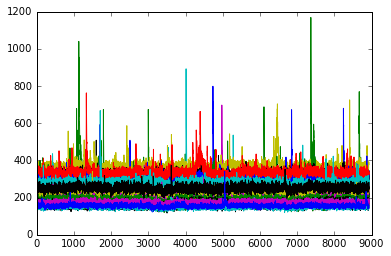

In [4]:
for i in range(50):
    plt.plot(activity_matrix_1[:,i])

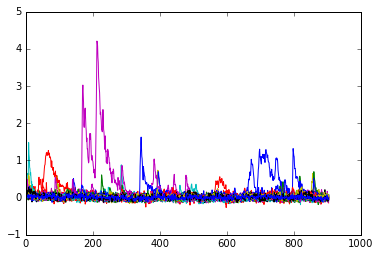

In [5]:
for i in range(50):
    plt.plot(activity_matrix_2[:,i])

In [6]:
import cobra_analysis

pop_coupling_strengths_1 = cobra_analysis.pop_corr_z_scored(activity_matrix_1)
pop_coupling_strengths_2 = cobra_analysis.pop_corr_z_scored(activity_matrix_2)

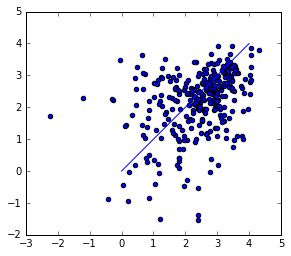

In [7]:
fig, ax = plt.subplots()
ax.scatter(pop_coupling_strengths_1, pop_coupling_strengths_2)

plt.plot(range(5))
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()